In [1]:
from keras.datasets import mnist

In [2]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [3]:
print(xtrain.shape)

(60000, 28, 28)


In [4]:
xtrain = xtrain.astype('float')/ 255
xtest = xtest.astype('float')/ 255
xtrain = xtrain.reshape(len(xtrain), 28, 28, 1)
xtest = xtest.reshape(len(xtest), 28, 28, 1)

In [1]:
import matplotlib.pyplot as plt 

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(1, n, i)
    plt.imshow(xtrain[i].reshape(28, 28))
    plt.gray()
plt.show()

NameError: name 'xtrain' is not defined

In [6]:
import keras
from keras import layers

In [11]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding = 'same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding = 'same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding = 'same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics = 'accuracy')


In [12]:
autoencoder.fit(xtrain, xtrain,
                epochs = 5,
                batch_size = 128,
                shuffle = True,
                validation_data = (xtest, xtest),
                verbose = 1
)

Epoch 1/5
469/469 [==============================] - 21s 40ms/step - loss: 0.2089 - accuracy: 0.7948 - val_loss: 0.1475 - val_accuracy: 0.8021
Epoch 2/5
469/469 [==============================] - 22s 46ms/step - loss: 0.1347 - accuracy: 0.8056 - val_loss: 0.1253 - val_accuracy: 0.8073
Epoch 3/5
469/469 [==============================] - 21s 45ms/step - loss: 0.1218 - accuracy: 0.8083 - val_loss: 0.1174 - val_accuracy: 0.8076
Epoch 4/5
469/469 [==============================] - 17s 37ms/step - loss: 0.1157 - accuracy: 0.8094 - val_loss: 0.1124 - val_accuracy: 0.8089
Epoch 5/5
469/469 [==============================] - 16s 35ms/step - loss: 0.1115 - accuracy: 0.8102 - val_loss: 0.1092 - val_accuracy: 0.8091


In [15]:
decoded_img = autoencoder.predict(xtest)

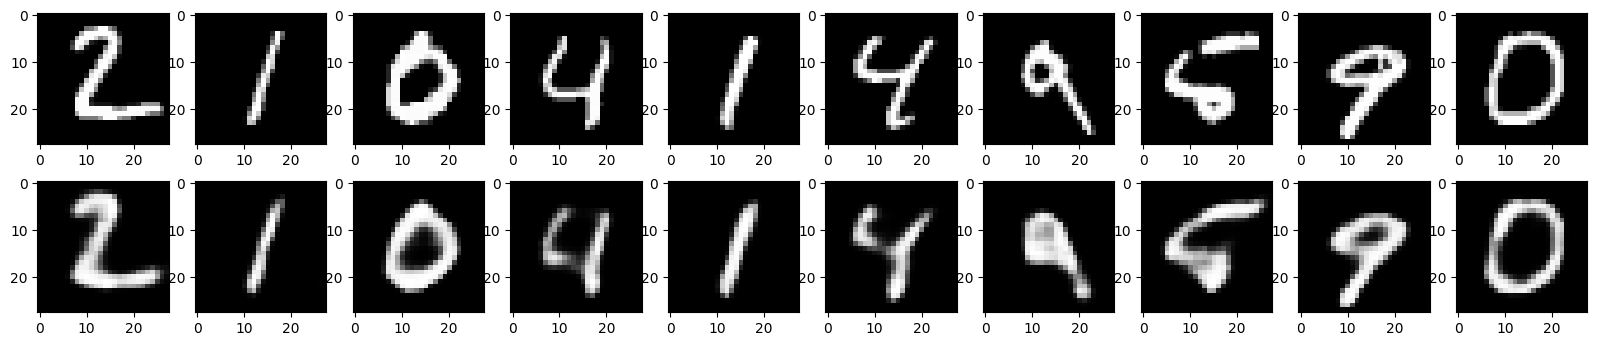

In [18]:
n = 10
plt.figure(figsize = (20, 4))
for i in range(1, n+1):
    ax = plt.subplot(2, n, i)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
plt.show()

In [19]:
encoder = keras.Model(input_img, encoded)